In [30]:
from math import ceil # https://docs.python.org/2/library/math.html#math.ceil
from matplotlib import pyplot as plt # https://matplotlib.org/api/pyplot_api.html
import numpy as np # https://docs.scipy.org/doc/numpy/
from numpy.random import randint # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
from fractions import Fraction # https://docs.python.org/3.1/library/fractions.html

In [31]:
# Points of the form (x, y)
sample = [(1, 2), (-3, 4), (3, 1), (-5, 5), (-1, 3), (-2, -4)]
n = len(sample)

In [32]:
def Fractionize(t):
    return tuple(Fraction(a).limit_denominator() for a in t)

In [33]:
Sample = [(Fractionize(p)) for p in sample]
Sample[:2]

[(Fraction(1, 1), Fraction(2, 1)), (Fraction(-3, 1), Fraction(4, 1))]

In [34]:
def build_wall(a,b):
    
    a = np.array(a)
    b = np.array(b)
    d = len(a)
    if d!=2:
        raise Exception(f"Points must be 2-dimensional, but you first input is length {d}.")
    if d!=len(b):
        raise Exception(f"Both points must be the same length, but your input are lengths {d} and {len(b)}.")
    if np.array_equal(a, b):
        print(f"The input must be distict.")
        return False
    # The vector from a to b is b-a, which is a normal vector to the wall dividing them.
    normal = a - b
    midpoint = (a + b)/2
    # Wall is an array [a,b,c,d] for plane ax+by+cz+d=0
    wall = np.append(normal,-sum(normal*midpoint))
    #wall = list(normal)
    #wall.append(-sum(normal*midpoint))
    #print(wall)
    if sum(normal*a)+wall[-1]>0:
        return wall
    else:
        return -wall

def generate_walls_with_sample(sample):
    n = len(sample)
    return [[build_wall(sample[i], sample[j]), [i,j]] for i in range(n - 1) for j in range(i + 1, n)]

In [35]:
walls_with = generate_walls_with_sample(Sample)
walls_with[:2]

[[array([Fraction(4, 1), Fraction(-2, 1), Fraction(10, 1)], dtype=object),
  [0, 1]],
 [array([Fraction(-2, 1), Fraction(1, 1), Fraction(5, 2)], dtype=object),
  [0, 2]]]

In [36]:
def generate_rival_dict(walls_with):
    rival_dict = {}
    for new,rs in walls_with:
        unseen = True
        for old in rival_dict:
            if np.array_equal(new*old[0], np.array(old)*new[0]):
                unseen = False
                r,s=rs
                x,y=sample[r]
                if (old[0]*x + old[1]*y + old[2] > 0):
                    rival_dict[old].append(rs)
                else:
                    rival_dict[old].append([s,r])
                break
        if unseen:
            rival_dict[tuple(new)] = [rs]
    return rival_dict

In [37]:
rival_dict = generate_rival_dict(walls_with)
rival_dict

{(Fraction(-4, 1), Fraction(2, 1), Fraction(-20, 1)): [[3, 4]],
 (Fraction(-3, 1), Fraction(9, 1), Fraction(-15, 1)): [[3, 5]],
 (Fraction(-2, 1), Fraction(1, 1), Fraction(5, 2)): [[0, 2]],
 (Fraction(-1, 1), Fraction(8, 1), Fraction(-5, 2)): [[1, 5]],
 (Fraction(1, 1), Fraction(7, 1), Fraction(5, 1)): [[4, 5]],
 (Fraction(2, 1), Fraction(-1, 1), Fraction(5, 2)): [[0, 4], [2, 1]],
 (Fraction(2, 1), Fraction(-1, 1), Fraction(25, 2)): [[1, 3]],
 (Fraction(3, 1), Fraction(6, 1), Fraction(15, 2)): [[0, 5]],
 (Fraction(4, 1), Fraction(-2, 1), Fraction(0, 1)): [[2, 4]],
 (Fraction(4, 1), Fraction(-2, 1), Fraction(10, 1)): [[0, 1], [2, 3]],
 (Fraction(5, 1), Fraction(5, 1), Fraction(5, 1)): [[2, 5]],
 (Fraction(6, 1), Fraction(-3, 1), Fraction(45, 2)): [[0, 3], [4, 1]]}

In [38]:
# Use this if you need a point (x,y) that lies on line ax+by+c=0 expressed as (a,b,c).
def point_on_line(line):
    try:
        a,b,c = line
    except valueError:
        print(f"A triple is expected for line, but {line} is length {len(line)}.")

    if a:
        return (-Fraction(c)/a, 0)
    else:
        return (0, -Fraction(c)/b)

# Use this to return the intersection (x,y) of two lines given as triples,
#  or False if the lines are parallel or identical.
def intersect_of_lines(l1, l2):
    try:
        a,b,c = l1
        d,e,f = l2
    except ValueError:
        print(f"Every line needs to be length 3, but {l1} or {l2} isn't.")
    
    denom = Fraction(a*e - b*d)
    if not denom:
        #print(f"Warning: {l1} and {l2} are parallel.")
        return False
    return (Fraction(b*f - c*e).limit_denominator()/denom, Fraction(c*d - a*f).limit_denominator()/denom)

In [39]:
print(point_on_line((3,0,1)))
print(intersect_of_lines((0,1,0), (.5, 0, 1)))

(Fraction(-1, 3), 0)
(Fraction(-2, 1), Fraction(0, 1))


In [40]:
[point_on_line(line) for line in rival_dict]

[(Fraction(-5, 2), 0),
 (Fraction(5, 4), 0),
 (Fraction(-15, 4), 0),
 (Fraction(-5, 4), 0),
 (Fraction(-5, 2), 0),
 (Fraction(-25, 4), 0),
 (Fraction(-5, 2), 0),
 (Fraction(0, 1), 0),
 (Fraction(-1, 1), 0),
 (Fraction(-5, 1), 0),
 (Fraction(-5, 1), 0),
 (Fraction(-5, 1), 0)]

In [41]:
[intersect_of_lines((0, 1, 0), line) for line in rival_dict]

[(Fraction(-5, 2), Fraction(0, 1)),
 (Fraction(5, 4), Fraction(0, 1)),
 (Fraction(-15, 4), Fraction(0, 1)),
 (Fraction(-5, 4), Fraction(0, 1)),
 (Fraction(-5, 2), Fraction(0, 1)),
 (Fraction(-25, 4), Fraction(0, 1)),
 (Fraction(-5, 2), Fraction(0, 1)),
 (Fraction(0, 1), Fraction(0, 1)),
 (Fraction(-1, 1), Fraction(0, 1)),
 (Fraction(-5, 1), Fraction(0, 1)),
 (Fraction(-5, 1), Fraction(0, 1)),
 (Fraction(-5, 1), Fraction(0, 1))]

In [42]:
# Use this to test if point (a 2-tuple) satifies (not necessarily strictly) bound (a 3-tuple).
def does_point_satisfy_bound(point, bound, strict=False):
    try:
        x,y = point
    except ValueError:
        print(f"The input point should be length 2, but you gave {point}.")
    try:
        a,b,c = bound
    except ValueError:
        print(f"The input bound should be length 3, but you gave {bound}.")
    test = a*x + b*y + c
    #print(a*x + b*y + c)
    if (test > 0) or ((not strict) and (test == 0)):
        return True
    return False
    
# Use this to generate a point on line (a 3-tuple) that strictly satisfies the bound (a 3-tuple).
# Exception: if the line and bound are the same, then will return a point on the line.
def point_on_line_satisfying_bound(line, bound):
    intersect = intersect_of_lines(line, bound)
    if intersect:
        point = (intersect[0] - line[1], intersect[1] + line[0])
        if does_point_satisfy_bound(point, bound):
            return point
        return (intersect[0] + line[1], intersect[1] - line[0])
    else:
        point = point_on_line(line)
        if does_point_satisfy_bound(point, bound):
            return point
        else:
            print(f"Warning: {line} is parallel to but on the wrong side of {bound}.")
            return False

In [43]:
[does_point_satisfy_bound((0, 0), bound) for bound in rival_dict]

[True, True, True, True, True, True, False, True, True, False, False, True]

In [44]:
[point_on_line_satisfying_bound((0, 1, 0), bound) for bound in rival_dict]

[(Fraction(-3, 2), Fraction(0, 1)),
 (Fraction(1, 4), Fraction(0, 1)),
 (Fraction(-11, 4), Fraction(0, 1)),
 (Fraction(-1, 4), Fraction(0, 1)),
 (Fraction(-3, 2), Fraction(0, 1)),
 (Fraction(-21, 4), Fraction(0, 1)),
 (Fraction(-7, 2), Fraction(0, 1)),
 (Fraction(1, 1), Fraction(0, 1)),
 (Fraction(0, 1), Fraction(0, 1)),
 (Fraction(-6, 1), Fraction(0, 1)),
 (Fraction(-6, 1), Fraction(0, 1)),
 (Fraction(-4, 1), Fraction(0, 1))]

In [45]:
[point_on_line_satisfying_bound(line, (0, 1, 0)) for line in rival_dict]

[(Fraction(-1, 2), Fraction(4, 1)),
 (Fraction(9, 4), Fraction(2, 1)),
 (Fraction(-3, 4), Fraction(6, 1)),
 (Fraction(-1, 4), Fraction(2, 1)),
 (Fraction(-17, 2), Fraction(3, 1)),
 (Fraction(-21, 4), Fraction(2, 1)),
 (Fraction(11, 2), Fraction(1, 1)),
 (Fraction(2, 1), Fraction(4, 1)),
 (Fraction(-6, 1), Fraction(5, 1)),
 (Fraction(-3, 1), Fraction(4, 1)),
 (Fraction(4, 1), Fraction(3, 1)),
 (Fraction(-12, 1), Fraction(1, 1))]

In [46]:
class Neighborhood:
    # Give bounds and/or corners in cyclic order (CW or CCW okay).
    # For bounded=False, bounds are required.
    # Each bound is a triple (a,b,c) representing ax + by + c > 0.
    # Each corner is a coordinate pair (x,y).
    # The endpoints of bound i are corners i-1 and i; inversely, the corner j is part of bounds j and j+1.
    def __init__(self, bounded=False, bounds=[], corners=[]):
        self.corners = [Fractionize(corner) for corner in corners]
        self.bounds = [Fractionize(bound) for bound in bounds]
        self.bounded = bounded
        
        if not corners:
            self.corners_from_bounds()
    
        if not bounds:
            if not bounded:
                if len(corners):
                    raise Exception(f"For an unbounded neighborhood, corners are not enough to determine bounds.")
            else:
                self.bounds_from_corners()
                
    # This uses the corners to compute the bounds.
    # Assumptions: bounded, at least 3 corners, cyclic order (CW or CCW fine).
    def bounds_from_corners(self):
        if len(self.corners)<3:
            raise Exception(f"You need at least 3 corners to compute bounds, but you only have {len(self.corners)}")
        self.bounds = []    
        for i in range(len(self.corners)):
            try:
                v,w = self.corners[i-1]
                x,y = self.corners[i]
            except ValueError:
                print(f"Every corner needs to be length 2, but corner {i-1} or {i} isn't.")
            line = (w - y, x - v, v*y - w*x)
            test = self.corners[i-2]
            side_test = test[0]*line[0] + test[1]*line[1] + line[2]
            if side_test==0:
                raise Exception(f"It appears corners {i-2}, {i-1}, and {i} are collinear.")
            elif side_test<0:
                line = tuple(-c for c in line)
            self.bounds.append(line)

    # This uses the bounds to compute the corners.
    # Assumptions: cyclic order (CW or CCW fine).
    def corners_from_bounds(self):
        if self.bounded and len(self.bounds)<3:
            raise Exception(f"If bounded, you need at least 3 bounds to compute corners, but you only have {len(self.bounds)}")
        self.corners = []
        for i in range(1, len(self.bounds)):
            corner = intersect_of_lines(self.bounds[i - 1], self.bounds[i])
            if corner:
                self.corners.append(corner)
        if self.bounded:
            self.corners.append(intersect_of_lines(self.bounds[-1], self.bounds[0]))
    
    # Returns the viewing window [[xlow, xhigh], [ylow, yhigh]] for the neighborhood.
    # Especially when self.bounded=False, a buffer > 0 is recommended.
    def window(self, buffer=0):
        if buffer<0:
            raise Exception(f"The buffer must be non-negative.")
        if self.corners:
            val_sets = zip(*self.corners)
            return [[float(min(vals) - buffer), float(max(vals) + buffer)] for vals in val_sets]
        return False
    
    # Output a plot of the neighborhood.
    # Turn show_plot to False if you are wanting to show several neighborhoods on the same plot.
    # Especially when self.bounded=False, a buffer > 0 is recommended.
    # Arrowhead is only used when self.bounded=False for plotting rays.
    def plot(self, show_plot=True, buffer=1, arrowhead=.1):
        from matplotlib import pyplot as plt
        try:
            xs,ys = zip(*self.corners)
        except ValueError:
            print("Neighborhood is whole plane or half plane; no corners means nothing to plot.")
        #plt.scatter(*zip(*self.corners)
        
        for i in range(len(xs)-1):
            plt.plot(xs[i:i+2], ys[i:i+2], '.-k')
        if self.bounded:
            plt.plot([xs[-1],xs[0]], [ys[-1],ys[0]], '-k')
        else:
            rays = [self.bounds[i] for i in [0,-1]]
            pal_indices = [1,-2]
            for i in [0,-1]:
                ray = self.bounds[i]
                pal = self.bounds[pal_indices[i]]
                x,y = self.corners[i]
                exits = self.line_hits_window(ray, buffer - arrowhead)
                for exit in exits:
                    if (exit[0]*pal[0] + exit[1]*pal[1] + pal[2])>=0:
                        plt.arrow(x, y, exit[0] - x, exit[1] - y, head_width=arrowhead)
                        break
            pass
        
        if show_plot:
            if buffer:
                xlim, ylim = self.window(buffer)
                #print(xlim, ylim)
                plt.xlim(*xlim)
                plt.ylim(*ylim)
        
            plt.show()
        
    # A simple test to make sure that each corner is interior with respect to a bound one bound away.
    def is_convex(self):
        if self.bounded:
            for i in range(len(self.corners)):
                if not does_point_satisfy_bound(self.corners[i - 2], self.bounds[i]):
                    return False
            
        else:
            for i in range(1, len(self.corners)):
                if not does_point_satisfy_bound(self.corners[i], self.bounds[i - 1]):
                    return False
            if len(self.corners)>1:
                if not does_point_satisfy_bound(self.corners[-2], self.bounds[-1]):
                    return False
                point = intersect_of_lines(self.bounds[0], self.bounds[-1])
                if point:
                    if does_point_satisfy_bound(point, self.bounds[1]):
                        return False
        
        return True

    # Given a triple (a,b,c) for line ax + by + c = 0, returns points where it intersects the viewing window.
    # This is for use with plotting when self.bounded=False.
    def line_hits_window(self, line, buffer=0):
        try:
            a,b,c = line
        except valueError:
            print(f"A triple is expected for line, but {line} is length {len(line)}.")
        xlim,ylim = self.window(buffer)
        solutions = []
        if line[0]:
            for y in ylim:
                x = -(b*y + c)/a
                if xlim[0]<=x and x<=xlim[1]:
                    solutions.append((x,y))
        if line[1]:
            for x in xlim:
                y = -(a*x + c)/b
                if ylim[0]<=y and y<=ylim[1]:
                    solutions.append((x,y))
        return list(set(solutions))
    
    # Given a triple (a,b,c) for line ax + by + c = 0, 
    #  returns a dictionary of intersections:
    #  keys: points (x,y) on the boundary where line transitions between exterior and interior,
    #        and 0 if the line intersects an unbounded neighborhood and crosses the bound.
    #  value: list [i, ...] of indices of bounds containing the point of intersection,
    #         length 0 if point is 0, 
    #         length 1 if intersects strictly between corners, 
    #         length 2 if intersects at a corner.
    # Assumptions: The given line is not one of the bounds.
    def line_intersects(self, line):
        try:
            a,b,c = line
        except valueError:
            print(f"A triple is expected for line, but {line} is length {len(line)}.")
        
        intersections = {}
        n = len(self.bounds)
        for i in range(n):
            point = intersect_of_lines(self.bounds[i], line)
            if point:
                #print(line, i, self.bounds[i], point)
                if (i==0 and not self.bounded) or does_point_satisfy_bound(point, self.bounds[i - 1]):
                    if (i==n-1 and not self.bounded) or does_point_satisfy_bound(point, self.bounds[(i + 1)%n]):
                        if point in intersections:
                            intersections[point].append(i)
                        else:
                            intersections[point] = [i]
        
        if not self.bounded:
            # If the neighborhood has no bounds, there is a trivial (non-boundary) intersection.
            if not n:
                intersections[0] = []
                
            # If the neighborhood has no corners, check if we're on the right side of the bound
            #  or between the two parallel bounds.
            elif (not self.corners) and (not intersections):
                point = point_on_line(line)
                if all(does_point_satisfy_bound(point, bound) for bound in self.bounds):
                    intersections[0] = []
            
            # Otherwise, check if line passes inside neighborhood (and thus out between the rays).
            elif len(intersections)==1:
                bound_indices = list(intersections.values())[0]
                if len(bound_indices)==1:
                    intersections[0] = []
                else:
                    b1, b2 = self.bounds[bound_indices[0]], self.bounds[bound_indices[1]]
                    point = point_on_line_satisfying_bound(line, b1)
                    if does_point_satisfy_bound(point, b2):
                        intersections[0] = []

        if len(intersections)>2:
            print(f"Neighborhood: bounded={self.bounded} ; bounds={self.bounds} ; corners={self.corners}")
            self.plot()
            print(f"line: {line}")
            print(f"intersections: {intersections}")
            raise Exception("Something has gone wrong for the line to intersect the boundary at more than 2 points!")
        
        return intersections
                    
    #
    def split_by_line(self, line):
        
        # If the neighborhood has no bounds, it's the whole plane,
        #  so we can just split it on the two sides of this line.
        if not self.bounds:
            First = Neighborhood(bounded=False, bounds=[line], corners=[])
            Second = Neighborhood(bounded=False, bounds=[tuple(-a for a in line)], corners=[])
            return(First, Second)
        
        # Otherwise, we need to see where the line intersects the neighborhood.
        intersections = self.line_intersects(line)
        #print(intersections)
        
        # If there is one intersection but the neighborhood has no corners,
        #  then the line is parallel to and on the correct side of the neighborhood's lone bound
        #  or the line is parallel to and between the neighborhood's two parallel bounds.
        if len(intersections)==1 and (not self.corners):
            first = [self.bounds[0]]
            if does_point_satisfy_bound(point_on_line(first[0]), line):
                first.append(line)
                second = [tuple(-a for a in line)]
            else:
                first.append(tuple(-a for a in line))
                second = [line]
            if len(self.bounds)>1:
                second.append(self.bounds[1])
            b1 = False
            b2 = False
            
        
        elif len(intersections)!=2:
            #raise Exception
            #print(f"The specified line ({line}) only intersects the neighborhood boundary {len(intersections)} time(s).")
            return False
        
        # Now that we have len(intersections)==2, we look at the bounded neighborhood case.
        elif self.bounded:
            
            new = []
            for key in intersections:
                value = intersections[key]
                if len(value)==1:
                    value = [value[0], value[0]]
                elif (max(value) - min(value)) > 1:
                    value = [-1, 0]
                new.append(value)
            #print(new)
            if new[0][0] > new[1][0]:
                new = [new[1], new[0]]
                
            first = self.bounds[new[0][1]:(new[1][0] + 1)]
            point = self.corners[new[0][1]]
            #print(f"new={new} ; first={first} ; point={point} ; line={line}")
            if does_point_satisfy_bound(point, line):
                first.append(line)
                second = [tuple(-a for a in line)]
            else:
                first.append(tuple(-a for a in line))
                second = [line]
            second.extend(self.bounds[new[1][1]:])
            second.extend(self.bounds[:(new[0][0] + 1)])
            b1 = True
            b2 = True
           
        # Now on to the unbounded case with len(intersections)==2
        else:
            b1 = False
            
            # The case where intersections[0]=0, which represents the line passing between the two rays.
            if 0 in intersections:
                
                if self.corners:
                    for key in intersections:
                        bound_indices = intersections[key]

                        # We only need to deal with key who'd corresponding value is a non-empty array.
                        if bound_indices:
                            #print(bound_indices, line)
                            i, j = bound_indices[0], bound_indices[-1]
                            first = self.bounds[:i+1]

                            if i==0 and j==1:
                                x,y = point_on_line_satisfying_bound(self.bounds[0], self.bounds[1])
                            else:
                                x,y = self.corners[0]

                            # The test below assumes (x,y) comes after the intersection,
                            #  so we need to negate the coefficients if it comes before (i.e., if j==0)
                            a,b,c = line
                            if j==0:
                                a, b, c = -a, -b, -c
                            if (a*x + b*y + c > 0):
                                first.append(line)
                                second = [tuple(-a for a in line)]
                            else:
                                first.append(tuple(-a for a in line))
                                second = [line]

                            second.extend(self.bounds[j:])
                            
                # Otherwise, if there are no corners,
                #  the new line simply intersects the one lone bound.
                else:
                    first = [self.bounds[0], line]
                    second = [tuple(-a for a in line), self.bounds[0]]
                    
                b2 = False
            
            # Otherwise, if 0 isn't a key in intersections, 
            #  the line intersects the boundary at two points.
            else:
                
                # If there is at least one corner,
                #  then the second of the new neighborhoods is bounded.
                if self.corners:                
                    new = []
                    for key in intersections:
                        value = intersections[key]
                        if len(value)==1:
                            value = [value[0], value[0]]
                        new.append(value)
                    #print(new)
                    if new[0][0] > new[1][0]:
                        new = [new[1], new[0]]

                    first = self.bounds[:(new[0][0] + 1)]
                    # Identify first corner after the first intersection.
                    point = self.corners[new[0][1]]
                    if does_point_satisfy_bound(point, line):
                        first.append(tuple(-a for a in line))
                        second = [line]
                    else:
                        first.append(line)
                        second = [tuple(-a for a in line)]
                    second.extend(self.bounds[new[0][1]:(new[1][0] + 1)])
                    first.extend(self.bounds[new[1][1]:])
                    b2 = True
                
                # This is the case with the line intersects parallel bounds of a corner-free neighborhood.
                else:
                    first = [self.bounds[0], line, self.bounds[1]]
                    second = [self.bounds[1], tuple(-a for a in line), self.bounds[0]]
                    b2 = False
            
        First = Neighborhood(bounded=b1, bounds=first, corners=[])
        Second = Neighborhood(bounded=b2, bounds=second, corners=[])
        
        return(First, Second)

    def point_inside(self):
        if self.bounds:
            if len(self.bounds)==1:
                a,b,c = self.bounds[0]
                # Define a line perpendicular to the lone bound.
                line = (-b, a, c)
                return point_on_line_satisfying_bound(line, self.bounds[0])
            
            else:
                l1,l2 = self.bounds[:2]
                p,q = point_on_line_satisfying_bound(l1, l2)
                r,s = point_on_line_satisfying_bound(l2, l1)
                point = ((p + r)/2, (q + s)/2)
                if self.corners:
                    #Pull closer to the corner between l1 and l2, until inside the neighborhood.
                    r,s = self.corners[0]
                    while not all(does_point_satisfy_bound(point, bound) for bound in self.bounds):
                        point = ((point[0] + r)/2, (point[1] + s)/2)
                return point
            
        else:
            return (0,0)

False [] [] True
False [(Fraction(0, 1), Fraction(1, 1), Fraction(0, 1))] [] True
False [(Fraction(0, 1), Fraction(1, 1), Fraction(0, 1)), (Fraction(1, 1), Fraction(0, 1), Fraction(1, 1))] [(Fraction(-1, 1), Fraction(0, 1))] True
True [(Fraction(0, 1), Fraction(1, 1), Fraction(0, 1)), (Fraction(1, 1), Fraction(0, 1), Fraction(1, 1)), (Fraction(-1, 1), Fraction(-1, 1), Fraction(1, 1))] [(Fraction(-1, 1), Fraction(0, 1)), (Fraction(-1, 1), Fraction(2, 1)), (Fraction(1, 1), Fraction(0, 1))] True
False [(Fraction(10, 1), Fraction(6, 1), Fraction(4, 1)), (Fraction(4, 1), Fraction(-3, 1), Fraction(11, 2)), (Fraction(-12, 1), Fraction(2, 1), Fraction(6, 1)), (Fraction(1, 1), Fraction(10, 1), Fraction(3, 2))] [(Fraction(-5, 6), Fraction(13, 18)), (Fraction(29, 28), Fraction(45, 14)), (Fraction(57, 122), Fraction(-12, 61))] False


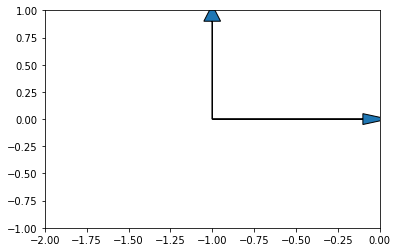

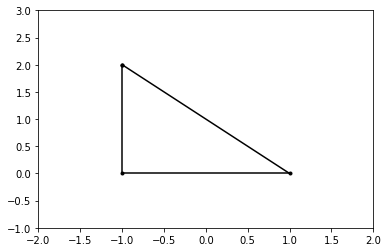

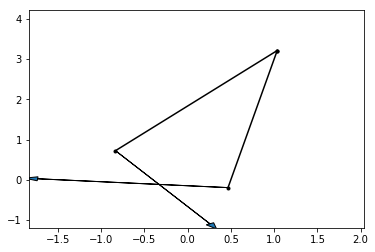

[None, None, None]

In [47]:
Ns = [Neighborhood(), 
      Neighborhood(bounded=False, bounds=[(0,1,0)]), 
      Neighborhood(bounded=False, bounds=[(0,1,0), (1,0,1)]), 
      Neighborhood(bounded=True, bounds=[(0,1,0), (1,0,1), (-1,-1,1)]), 
      Neighborhood(bounded=False, bounds=[(10, 6, 4), (4, -3, 5.5), (-12, 2, 6), (1, 10, 1.5)]),
     ]
for N in Ns:
    print(N.bounded, N.bounds, N.corners, N.is_convex())
[N.plot() for N in Ns[2:]]

In [48]:
def test_split(bounded, bounds, line):
    nghbrhd = Neighborhood(bounded=bounded, bounds=bounds)
    nghbrhd.plot()
    print(f"bounds: {nghbrhd.bounds}")
    print(f"corners: {nghbrhd.corners}")
    print(f"intersection with {line}: {nghbrhd.line_intersects(line)}")
    print(f"nghbrhd is convex: {nghbrhd.is_convex()}")
    split = nghbrhd.split_by_line(line)
    if split:
        for newbrhd in split:
            newbrhd.plot()
            print(newbrhd.bounded, newbrhd.bounds, newbrhd.corners, newbrhd.is_convex())
    else:
        print(f"{line} doesn't cut through nghbrhd.")

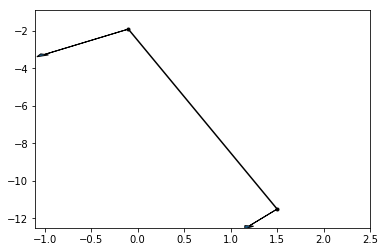

bounds: [(Fraction(-3, 1), Fraction(1, 1), Fraction(16, 1)), (Fraction(-6, 1), Fraction(-1, 1), Fraction(-5, 2)), (Fraction(3, 1), Fraction(-2, 1), Fraction(-7, 2))]
corners: [(Fraction(3, 2), Fraction(-23, 2)), (Fraction(-1, 10), Fraction(-19, 10))]
intersection with (8.0, -7.0, -12.5): {(Fraction(-1, 10), Fraction(-19, 10)): [1, 2]}
nghbrhd is convex: True
(8.0, -7.0, -12.5) doesn't cut through nghbrhd.


In [49]:
#test_split(False, [(3.0, 6.0, 7.5), (-2.0, 1.0, -2.5)], (2.0, -1.0, 12.5))
#test_split(False, [(4.0, -2.0, 10.0), (3.0, 6.0, 7.5), (-2.0, 1.0, -2.5)], line = (-1.0, 8.0, -2.5))
#test_split(False, [(-4.0, 2.0, -10.0), (3.0, 6.0, 7.5), (6.0, -3.0, 22.5)], (-1.0, 8.0, -2.5))
#test_split(True, [(1.0, -8.0, 2.5), (2.0, -1.0, 2.5), (3.0, 6.0, 7.5), (-2.0, 1.0, 2.5)], (4.0, -2.0, -0.0))
#test_split(False, [(-3.0, -5.0, -7.0), (-2.0, 0.0, 2.0), (2.0, 7.0, 12.5)], (-4.0, -7.0, -10.5))
#test_split(False, [(-3.0, 1.0, 16.0), (-6.0, -1.0, -2.5), (8.0, -7.0, -12.5), (3.0, -2.0, -3.5)], (-3.0, -3.0, -6.0))
#test_split(False, [(-3.0, 1.0, 16.0), (-6.0, -1.0, -2.5), (8.0, -7.0, -12.5)], (3.0, -2.0, -3.5))
test_split(False, [(-3.0, 1.0, 16.0), (-6.0, -1.0, -2.5), (3.0, -2.0, -3.5)], (8.0, -7.0, -12.5))

In [50]:
def generate_neighborhoods_from_walls(walls, bound=0, show_plot=False, debug=False):
    if bound:
        world = [Neighborhood(bounded=True, bounds=[(1,0,bound), (0,1,bound), (-1,0,bound), (0,-1,bound)])]
    else:
        world = [Neighborhood()]
        
    for wall in walls:
        if debug:
            print(f"\nBuilding {wall} now...")
        whole_new_world = []
        for land in world:
            if debug:
                print(land.bounds, land.corners, wall)
            new_lands = land.split_by_line(wall)
            if new_lands:
                if not all(new_land.is_convex() for new_land in new_lands):
                    print(f"Error! Some neighborhoods not convex after intersecting {land.bounds} with {wall}:")
                    print([new_land.is_convex() for new_land in new_lands])
                    if debug:
                        [new_land.plot() for new_land in new_lands]# if not new_land.is_convex()]
                whole_new_world.extend(new_lands)
            else:
                whole_new_world.append(land)
        if debug:
            print(f"After dealing with wall {wall}, there are {len(whole_new_world)} neighborhoods.")
        world = whole_new_world.copy()
    
    if show_plot:
        buffer = 1
        windows = [land.window() for land in world]
        xs = [window[0] for window in windows if window]
        xlows, xhighs = zip(*xs)
        plt.xlim(min(xlows) - buffer, max(xhighs) + buffer)
        ys = [window[1] for window in windows if window]
        ylows, yhighs = zip(*ys)
        plt.ylim(min(ylows) - buffer, max(yhighs) + buffer)
        [land.plot(show_plot=False) for land in world]
        plt.show()
    
    return world

walls: dict_keys([(Fraction(4, 1), Fraction(-2, 1), Fraction(10, 1)), (Fraction(-2, 1), Fraction(1, 1), Fraction(5, 2)), (Fraction(6, 1), Fraction(-3, 1), Fraction(45, 2)), (Fraction(2, 1), Fraction(-1, 1), Fraction(5, 2)), (Fraction(3, 1), Fraction(6, 1), Fraction(15, 2)), (Fraction(2, 1), Fraction(-1, 1), Fraction(25, 2)), (Fraction(-1, 1), Fraction(8, 1), Fraction(-5, 2)), (Fraction(4, 1), Fraction(-2, 1), Fraction(0, 1)), (Fraction(5, 1), Fraction(5, 1), Fraction(5, 1)), (Fraction(-4, 1), Fraction(2, 1), Fraction(-20, 1)), (Fraction(-3, 1), Fraction(9, 1), Fraction(-15, 1)), (Fraction(1, 1), Fraction(7, 1), Fraction(5, 1))])


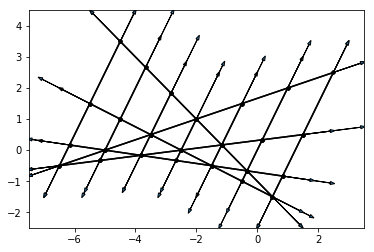

In [51]:
#sample = [(-3, -3), (0, 2), (-2, -5), (2, 2), (3, 2)]
#Sample = [Fractionize(point) for point in sample]
#walls_with = generate_walls_with_sample(Sample)
walls = generate_rival_dict(walls_with).keys()
print(f"walls: {walls}")
world = generate_neighborhoods_from_walls(walls, show_plot=True)

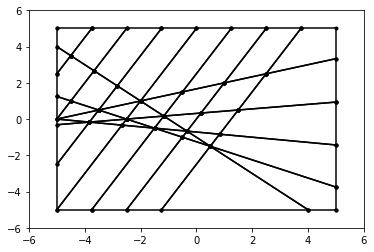

In [52]:
world = generate_neighborhoods_from_walls(walls, bound=5, show_plot=True)

In [53]:
def order_nearness(neighborhood, rival_dict, n):
    priorities = []
    
    # This first failed attemp assumed every line was going to show up on every neighborhood.
    '''for a,b,c in neighborhood.bounds:
        for bound in rival_dict:
            d,e,f = bound
            #First check if they are parallel.
            if (a*e - b*d)==0:
                #Then check if they are the same line.
                if (a*f - c*d)==0:
                    #Then identify whether their inequality is in the same direction.
                    if a*d>=0 and b*e>=0:
                        priorities.extend(rival_dict[bound])
                    else:
                        priorities.extend([q,p] for p,q in rival_dict[bound])
                    break'''
    
    # Generate a point inside the neighborhood and test it against all rivalries.
    # Assumes all rivalries have been used in neighborhood creation process.
    point = neighborhood.point_inside()
    for bound in rival_dict:
        if does_point_satisfy_bound(point, bound):
            priorities.extend(rival_dict[bound])
        else:
            priorities.extend([q,p] for p,q in rival_dict[bound])
    
    loss_counts = [0]*n
    for p,q in priorities:
        loss_counts[q] += 1
    nearest = [0]*n
    for i,c in enumerate(loss_counts):
        nearest[c] = i
        
    return nearest

In [54]:
order_nearness(world[0], rival_dict, n)

[2, 0, 4, 1, 3, 5]

In [55]:
def generate_neighborhoods_with_nearness(sample, bound=False, show_plot=False):
    walls_with = generate_walls_with_sample(sample)
    rival_dict = generate_rival_dict(walls_with)
    world = generate_neighborhoods_from_walls(rival_dict.keys(), bound=bound, show_plot=show_plot)
    
    n = len(sample)
    return [[land, order_nearness(land, rival_dict, n)] for land in world]

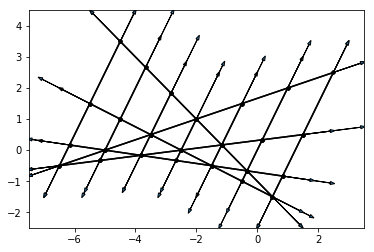

'401235,401253,401523,405123,540123,450123,042135,042153,024135,024153,054213,045213,042513,052413,025413,024513,502413,504213,204135,204153,204513,205413,250413,520413,410325,410532,410352,541032,451032,415032,143025,134025,143052,134052,314025,314052,314502,315402,351402,531402,513402,514302,134502,135402,153402,143502,145302,154302'

In [56]:
world = generate_neighborhoods_with_nearness(sample, show_plot=True)
",".join("".join(str(i) for i in land[1]) for land in world)

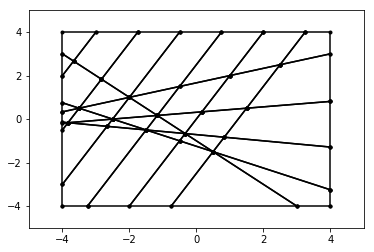

'204135,204153,205413,204513,520413,250413,540123,450123,405123,401235,401253,401523,502413,504213,042153,042135,024153,024135,054213,045213,042513,052413,025413,024513,514302,143502,154302,145302,134025,143025,134052,143052,541032,451032,415032,410325,410352,410532'

In [57]:
world = generate_neighborhoods_with_nearness(sample, bound=4, show_plot=True)
",".join("".join(str(i) for i in land[1]) for land in world)

In [58]:
from datetime import datetime

def test(n, sample=False, bound=False, show_plot=False):
    if sample:
        if not n:
            n = len(sample)
        elif n!=len(sample):
            raise Exception(f"The input n={n} doesn't match the length-{len(sample)}: {sample}")
    else:
        sample = []
        while(len(set(list(sample)))<n):
            sample = [(randint(-n, n + 1), randint(-n, n + 1)) for i in range(n)]
    print(f"{n}: {sample}")
    t_start = datetime.now()
    walls_with = generate_walls_with_sample(sample)
    walls = generate_rival_dict(walls_with).keys()
    print(list(walls))
    world = generate_neighborhoods_from_walls(walls, bound=bound, show_plot=show_plot)
    t_elapsed = datetime.now() - t_start
    return (sample, t_elapsed, len(walls))

3: [(-3, 2), (2, 2), (0, 1)]
[(-5.0, 0.0, -2.5), (-3.0, 1.0, -6.0), (2.0, 1.0, -3.5)]


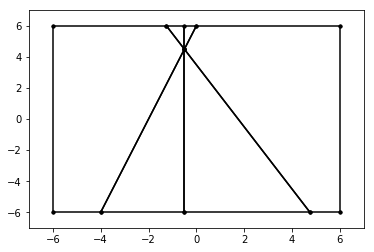

Generating the neighborhoods for [(-3, 2), (2, 2), (0, 1)] took 0:00:00.131174 seconds.
4: [(2, 1), (4, 3), (0, -1), (-2, 2)]
[(-2.0, -2.0, 10.0), (2.0, 2.0, -2.0), (4.0, -1.0, 1.5), (4.0, 4.0, -12.0), (6.0, 1.0, -8.5), (2.0, -3.0, 3.5)]


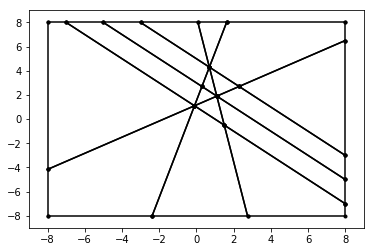

Generating the neighborhoods for [(2, 1), (4, 3), (0, -1), (-2, 2)] took 0:00:00.180764 seconds.
5: [(-1, -1), (4, -5), (-2, -1), (-3, -2), (1, 1)]
[(-5.0, 4.0, 19.5), (1.0, 0.0, 1.5), (2.0, 1.0, 5.5), (-2.0, -2.0, -0.0), (6.0, -4.0, -18.0), (7.0, -3.0, -14.0), (3.0, -6.0, -19.5), (1.0, 1.0, 4.0), (-3.0, -2.0, -1.5), (-4.0, -3.0, -5.5)]


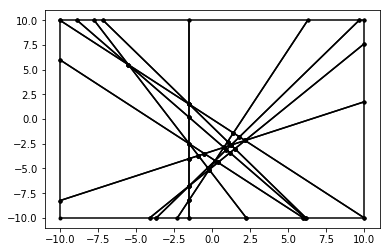

Generating the neighborhoods for [(-1, -1), (4, -5), (-2, -1), (-3, -2), (1, 1)] took 0:00:00.350002 seconds.
6: [(-2, 2), (4, -6), (-3, -6), (-2, 1), (4, 6), (-1, -4)]
[(-6.0, 8.0, 22.0), (1.0, 8.0, 18.5), (0.0, 1.0, -1.5), (-6.0, -4.0, 22.0), (-1.0, 6.0, 4.5), (7.0, 0.0, -3.5), (6.0, -7.0, -23.5), (5.0, -2.0, -17.5), (-1.0, -7.0, -20.0), (-7.0, -12.0, 3.5), (-2.0, -2.0, -14.0), (-6.0, -5.0, 23.5), (-1.0, 5.0, 6.0), (5.0, 10.0, -17.5)]


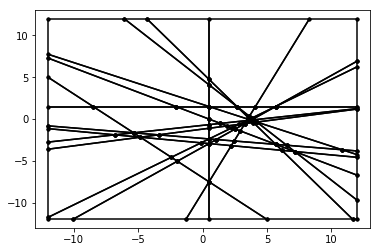

Generating the neighborhoods for [(-2, 2), (4, -6), (-3, -6), (-2, 1), (4, 6), (-1, -4)] took 0:00:00.659794 seconds.
7: [(2, -6), (0, 0), (-7, -1), (4, -5), (6, -1), (-1, 6), (7, -5)]
[(2.0, -6.0, -20.0), (9.0, -5.0, 5.0), (-2.0, -1.0, 0.5), (-4.0, -5.0, -1.5), (3.0, -12.0, -1.5), (-5.0, -1.0, 17.0), (7.0, 1.0, 25.0), (-4.0, 5.0, 20.5), (-6.0, 1.0, 18.5), (1.0, -6.0, 18.5), (-7.0, 5.0, 37.0), (-11.0, 4.0, -4.5), (-13.0, 0.0, -6.5), (-6.0, -7.0, -6.5), (-14.0, 4.0, 12.0), (-2.0, -4.0, -2.0), (5.0, -11.0, -2.0), (-3.0, 0.0, 16.5), (7.0, -7.0, -0.0), (-1.0, 4.0, 18.5), (-8.0, 11.0, 18.5)]


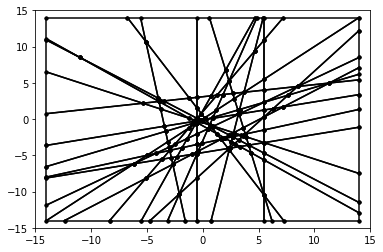

Generating the neighborhoods for [(2, -6), (0, 0), (-7, -1), (4, -5), (6, -1), (-1, 6), (7, -5)] took 0:00:01.268090 seconds.
8: [(-6, 6), (0, 0), (5, 7), (3, 8), (-8, 5), (-4, 7), (-5, -5), (6, 0)]
[(-6.0, 6.0, -36.0), (-11.0, -1.0, 1.0), (-9.0, -2.0, 0.5), (2.0, 1.0, 8.5), (-2.0, -1.0, -3.5), (-1.0, 11.0, -11.0), (-12.0, 6.0, -18.0), (-5.0, -7.0, 37.0), (-3.0, -8.0, 36.5), (8.0, -5.0, 44.5), (4.0, -7.0, 32.5), (5.0, 5.0, 25.0), (-6.0, 0.0, 18.0), (2.0, -1.0, -0.5), (13.0, 2.0, 7.5), (9.0, 0.0, -4.5), (10.0, 12.0, -12.0), (-1.0, 7.0, -19.0), (11.0, 3.0, 8.0), (7.0, 1.0, -4.0), (8.0, 13.0, -11.5), (-3.0, 8.0, -18.5), (-4.0, -2.0, -12.0), (-3.0, 10.0, -19.5), (-14.0, 5.0, -26.5), (1.0, 12.0, -7.5), (-10.0, 7.0, -14.5), (-11.0, -5.0, -7.0)]


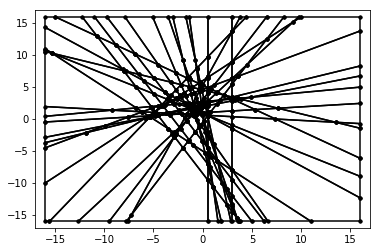

Generating the neighborhoods for [(-6, 6), (0, 0), (5, 7), (3, 8), (-8, 5), (-4, 7), (-5, -5), (6, 0)] took 0:00:02.264879 seconds.
9: [(-2, -8), (-8, -3), (2, 5), (2, 1), (-2, -7), (5, -2), (6, 4), (-5, -8), (7, -6)]
[(6.0, -5.0, 2.5), (-4.0, -13.0, -19.5), (-4.0, -9.0, -31.5), (0.0, -1.0, -7.5), (-7.0, -6.0, -19.5), (-8.0, -12.0, -8.0), (3.0, 0.0, 10.5), (-9.0, -2.0, 8.5), (-10.0, -8.0, -22.0), (-10.0, -4.0, -34.0), (-6.0, 4.0, -10.0), (-13.0, -1.0, -22.0), (-14.0, -7.0, -10.5), (-3.0, 5.0, 8.0), (-15.0, 3.0, 6.0), (4.0, 12.0, 12.0), (-3.0, 7.0, -0.0), (-4.0, 1.0, 11.5), (7.0, 13.0, 30.0), (-5.0, 11.0, 28.0), (4.0, 8.0, 24.0), (-3.0, 3.0, 12.0), (-4.0, -3.0, 23.5), (7.0, 9.0, 42.0), (-5.0, 7.0, 40.0), (-7.0, -5.0, -12.0), (-8.0, -11.0, -0.5), (3.0, 1.0, 18.0), (-9.0, -1.0, 16.0), (-1.0, -6.0, 11.5), (10.0, 6.0, 30.0), (-2.0, 4.0, 28.0), (11.0, 12.0, 18.5), (-1.0, 10.0, 16.5), (-12.0, -2.0, -2.0)]


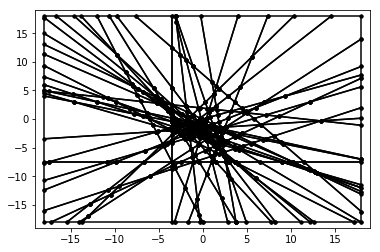

Generating the neighborhoods for [(-2, -8), (-8, -3), (2, 5), (2, 1), (-2, -7), (5, -2), (6, 4), (-5, -8), (7, -6)] took 0:00:03.826460 seconds.
10: [(-4, -8), (5, 8), (4, 1), (9, -4), (-6, -5), (7, 2), (-7, -3), (-4, 0), (-9, 1), (-7, -9)]


IndexError: list index out of range

In [60]:
samples = []
times = []
walls = []
max_n = 16
for n in range(3, max_n + 1):
    s,t,u = test(n, bound=2*n, show_plot=True)
    samples.append(s)
    times.append(str(t))
    walls.append(u)
    print(f"Generating the neighborhoods for {s} took {t} seconds.")
#list(zip(range(3, max_n + 1), walls, times))

In [61]:
list(zip(range(3, max_n + 1), walls, times))

[(3, 3, '0:00:00.131174'),
 (4, 6, '0:00:00.180764'),
 (5, 10, '0:00:00.350002'),
 (6, 14, '0:00:00.659794'),
 (7, 21, '0:00:01.268090'),
 (8, 28, '0:00:02.264879'),
 (9, 35, '0:00:03.826460')]

test(10,[(1, -6), (5, 7), (5, -3), (-2, 3), (2, -1), (7, 3), (0, -5), (-3, 2), (-5, -10), (-5, -4)])

sample = [(5, 0), (1, -4), (0, 0), (9, 12), (-3, -9), (-1, -14), (6, -9), (-7, 8), (-3, -8), (-8, 1), (-14, 10), (11, 6), (-4, 11), (7, 7)]
walls_with = generate_walls_with_sample(sample)
walls = generate_rival_dict(walls_with).keys()
print(list(walls))
world = generate_neighborhoods_from_walls(walls)

sample = [(1, -6), (5, 7), (5, -3), (-2, 3), (2, -1), (7, 3), (0, -5), (-3, 2), (-5, -10), (-5, -4)]
walls_with = generate_walls_with_sample(sample)
walls = generate_rival_dict(walls_with).keys()
print(list(walls))
world = generate_neighborhoods_from_walls(walls)

In [ ]:
sorted([1,2,1,3])

In [ ]:
def generate_k_neighborhood_dict(k, world_with_orders):
    k_dict = {}
    for land,order in world_with_orders:
        k_neighborhood = tuple(sorted(order[:k]))
        if k_neighborhood in k_dict:
            k_dict[k_neighborhood].append(land)
        else:
            k_dict[k_neighborhood] = [land]
    
    print(f"The total number of {k}-neighborhoods is {len(k_dict)}.")
    return k_dict

In [ ]:
sample = [(1, -6), (5, 7), (5, -3), (-2, 3), (2, -1)]
world = generate_neighborhoods_with_nearness(sample, show_plot=True)
k_dicts = []
for k in range(len(sample)):
    k_dicts.append(generate_k_neighborhood_dict(k, world))

In [ ]:
[{key: len(k_dict[key]) for key in k_dict} for k_dict in k_dicts]

In [ ]:
def generate_k_neighborhoods(sample, k, bound=False, show_plot=False):
    world = generate_neighborhoods_with_nearness(sample, show_plot=show_plot)
    k_dict = generate_k_neighborhood_dict(k, world)
    print(f"The numbers of neighborhoods for each {k}-neighborhood are as follows:")
    print({key: len(k_dict[key]) for key in k_dict})
    return [world, k_dict]

In [ ]:
k_world = generate_k_neighborhoods([(1, -6), (5, 7), (5, -3), (-2, 3)], 2)